# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_CCB/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Build the endpoint URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="
units = 'imperial'
city_url = base_url + weather_api_key + '&units=' + units + '&q='

print('Beginning Data Retrieval')
print('------------------------')

# set up lists to hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_counter = 0
set_counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:  
    query = city_url + city
    data = requests.get(query).json()

    # Try to grab the weather data if available in the openweathermap API
    try:
        city_name.append(data['name'])
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
       
        #If-else to designate a Set as being 49 cities
        if city_counter >= 49:
            city_counter = 1
            set_counter = set_counter + 1
        else:
            city_counter = city_counter + 1
            
        print(f'Processing Record {city_counter} of Set {set_counter} | {city}')
        
        time.sleep(1)
    
    # Handle exceptions for a city that is not available in the openweathermap API   
    except:
        print('City not found. Skipping...')
        
print(f'------------------------')
print(f'Data Retrieval Complete')
print(f'------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | ahuimanu
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | genhe
City not found. Skipping...
Processing Record 7 of Set 1 | evensk
Processing Record 8 of Set 1 | elmvale
Processing Record 9 of Set 1 | pio ix
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | nosy varika
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | rawah
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | shambu
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | alek

Processing Record 37 of Set 4 | sisimiut
Processing Record 38 of Set 4 | banda aceh
Processing Record 39 of Set 4 | labuan
Processing Record 40 of Set 4 | wajir
Processing Record 41 of Set 4 | northam
Processing Record 42 of Set 4 | cuauhtemoc
Processing Record 43 of Set 4 | biltine
Processing Record 44 of Set 4 | hervey bay
Processing Record 45 of Set 4 | asfi
Processing Record 46 of Set 4 | kununurra
City not found. Skipping...
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | bairiki
Processing Record 1 of Set 5 | roma
Processing Record 2 of Set 5 | makakilo city
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | west bay
Processing Record 5 of Set 5 | betioky
Processing Record 6 of Set 5 | pangai
Processing Record 7 of Set 5 | faya
City not found. Skipping...
Processing Record 8 of Set 5 | hovd
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | kruisfontein
Processing R

City not found. Skipping...
Processing Record 35 of Set 8 | puerto rico
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | turan
Processing Record 38 of Set 8 | ponta delgada
Processing Record 39 of Set 8 | uruguaiana
Processing Record 40 of Set 8 | marsa matruh
Processing Record 41 of Set 8 | odweyne
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | novobataysk
Processing Record 45 of Set 8 | olavarria
City not found. Skipping...
Processing Record 46 of Set 8 | romitan
City not found. Skipping...
Processing Record 47 of Set 8 | udomlya
Processing Record 48 of Set 8 | arriaga
Processing Record 49 of Set 8 | pangnirtung
Processing Record 1 of Set 9 | berdigestyakh
Processing Record 2 of Set 9 | ketchikan
City not found. Skipping...
Processing Record 3 of Set 9 | okha
Processing Record 4 of Set 9 | lekoni
Processing Record 5 of Set 9 | dubna
Processing Record 6 of Set 9 | dandong
Processing Record 7 of Set 9 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Create DataFrame
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

# Export dataframe to CSV
weather_data.to_csv(output_data_file)

In [119]:
# Read the csv (to avoid rerunning the API call) and display the Dataframe.
weather_data_df = pd.read_csv("output_data_CCB/cities.csv").drop('Unnamed: 0', axis =1)
weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,‘Āhuimanu,21.44,-157.84,87.80,66,20,12.75,US,1602466119
1,Hermanus,-34.42,19.23,53.01,78,57,4.00,ZA,1602465941
2,Port Alfred,-33.59,26.89,53.78,68,5,7.20,ZA,1602466123
3,Jamestown,42.10,-79.24,62.01,72,90,6.93,US,1602465971
4,Saskylakh,71.92,114.08,17.51,95,84,8.14,RU,1602466127
...,...,...,...,...,...,...,...,...,...
531,Talnakh,69.49,88.40,24.80,92,40,22.37,RU,1602467237
532,Roald,62.58,6.13,44.60,93,83,3.36,NO,1602467239
533,Huaidian,33.43,115.03,66.04,72,97,7.87,CN,1602467241
534,Claresholm,50.03,-113.59,46.99,45,6,8.05,CA,1602467243


In [11]:
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,5.360000e+02
mean,20.361399,16.357668,60.712892,74.412313,51.059701,7.626549,1.602467e+09
std,33.597334,90.538368,17.991911,19.374802,40.812177,5.265422,3.752495e+02
min,-54.800000,-179.170000,11.590000,13.000000,0.000000,0.200000,1.602466e+09
25%,-8.032500,-64.407500,46.035000,66.000000,1.000000,3.360000,1.602466e+09
50%,22.915000,20.255000,63.645000,78.500000,48.500000,6.555000,1.602467e+09
75%,49.132500,94.877500,76.552500,88.000000,93.250000,10.290000,1.602467e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,28.900000,1.602467e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no cities have humidity higher than 100%, so SKIP

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
quartiles = weather_data_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 66.0
The upper quartile of humidity is: 88.0
The interquartile range of humidity is: 22.0
The the median of humidity is: 78.5 
Values below 33.0 could be outliers.
Values above 121.0 could be outliers.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data_df.drop(weather_data_df[weather_data_df['Humidity'] < 33].index, inplace = False)
clean_city_data

,index,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,‘Āhuimanu,21.44,-157.84,87.80,66,20,12.75,US,1602466119
1,1,1,Hermanus,-34.42,19.23,53.01,78,57,4.00,ZA,1602465941
2,2,2,Port Alfred,-33.59,26.89,53.78,68,5,7.20,ZA,1602466123
3,3,3,Jamestown,42.10,-79.24,62.01,72,90,6.93,US,1602465971
4,4,4,Saskylakh,71.92,114.08,17.51,95,84,8.14,RU,1602466127
...,...,...,...,...,...,...,...,...,...,...,...
531,531,531,Talnakh,69.49,88.40,24.80,92,40,22.37,RU,1602467237
532,532,532,Roald,62.58,6.13,44.60,93,83,3.36,NO,1602467239
533,533,533,Huaidian,33.43,115.03,66.04,72,97,7.87,CN,1602467241
534,534,534,Claresholm,50.03,-113.59,46.99,45,6,8.05,CA,1602467243


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This matplotlib scatter plot is analyzing the max temperature on 10/11/2020 relative to the latitudes of the cities within the dataset. Higher temperatures are observed in cities closer to the equator (lat = 0).


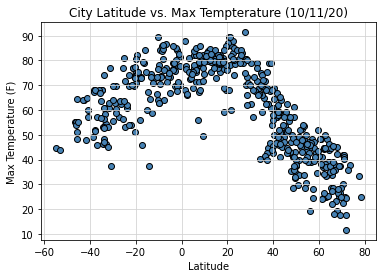

In [6]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Tempterature (10/11/20)')
plt.grid(color='lightgrey', linestyle='-', linewidth=1, alpha = 0.8)

print('This matplotlib scatter plot is analyzing the max temperature on 10/11/2020 relative to the latitudes of the cities within the dataset. Higher temperatures are observed in cities closer to the equator (lat = 0).')
plt.savefig('output_data_CCB/Latitude_vs_Max-Temp_10-11-2020.png')
plt.show()

## Latitude vs. Humidity Plot

This matplotlib scatter plot is analyzing the humidity on 10/11/2020 relative to the latitudes of the cities within the dataset.


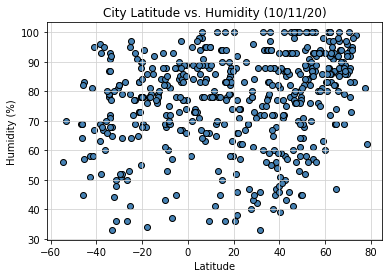

In [7]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="steelblue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/11/20)')
plt.grid(color='lightgrey', linestyle='-', linewidth=1, alpha = 0.8)

print('This matplotlib scatter plot is analyzing the humidity on 10/11/2020 relative to the latitudes of the cities within the dataset.')
plt.savefig('output_data_CCB/Latitude_vs_Humidity_10-11-2020.png')
plt.show()

## Latitude vs. Cloudiness Plot

This matplotlib scatter plot is analyzing the cloudiness on 10/11/2020 relative to the latitudes of the cities within the dataset.


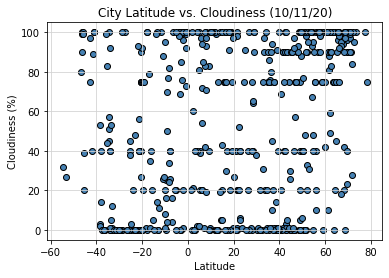

In [8]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/11/20)')
plt.grid(color='lightgrey', linestyle='-', linewidth=1, alpha = 0.8)

print('This matplotlib scatter plot is analyzing the cloudiness on 10/11/2020 relative to the latitudes of the cities within the dataset.')
plt.savefig('output_data_CCB/Latitude_vs_Cloudiness_10-11-2020.png')
plt.show()

## Latitude vs. Wind Speed Plot

This matplotlib scatter plot is analyzing the wind speed on 10/11/2020 relative to the latitudes of the cities within the dataset.


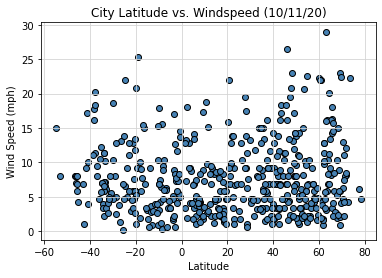

In [9]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Windspeed (10/11/20)')
plt.grid(color='lightgrey', linestyle='-', linewidth=1, alpha = 0.8)

print('This matplotlib scatter plot is analyzing the wind speed on 10/11/2020 relative to the latitudes of the cities within the dataset.')
plt.savefig('output_data_CCB/Latitude_vs_Wind-Speed_10-11-2020.png')
plt.show()

## Linear Regression

In [87]:
#defining a function to generate linear regression models using just the variables

def lin_reg(x, y, xytext):
    slope, b_int, r, p, std_err = linregress(x,y)
    line_eq = (f'y= {round(slope,2)}x + {round(b_int,2)}') #y = mx + b
    
    plt.scatter(x , y, marker='o')
        
    fit = slope * x + b_int
    plt.plot(x, fit, color='r')
    plt.annotate(line_eq, xytext, color='r', fontsize=15)

    print(f'The r-value is: {round(r, 5)}')
    
    plt.savefig(f'output_data_CCB/Linear_Regression/{title}.png')
    
    plt.show()

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.87236


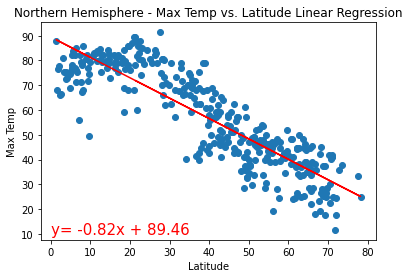

In [89]:
x = northern_hemisphere['Lat']
y = northern_hemisphere['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
title = ('Northern Hemisphere - Max Temp vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (0,10))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.67577


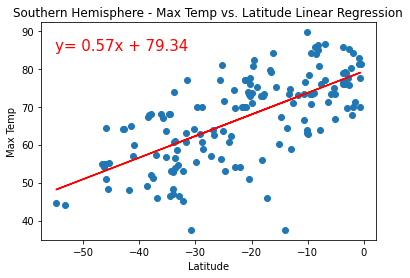

This set of matplotlib scatter plots are analyzing the max temperature (F) on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. The nothern hemisphere cities have a strong negative correlation with temperatures decreasing the farther north from the equator. The positive correlation for the cities in the southern hemisphere indicate the temperatures also increase closer to the equator but it is not as cool at the southern most city relative to the nothern. Outliers were removed and the fewer number of data points in the southern hemisphere, may be skewing the results.


In [110]:
x = southern_hemisphere['Lat']
y = southern_hemisphere['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
title = ('Southern Hemisphere - Max Temp vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (-55, 85))
print('This set of matplotlib scatter plots are analyzing the max temperature (F) on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. The nothern hemisphere cities have a strong negative correlation with temperatures decreasing the farther north from the equator. The positive correlation for the cities in the southern hemisphere indicate the temperatures also increase closer to the equator but it is not as cool at the southern most city relative to the nothern. Outliers were removed and the fewer number of data points in the southern hemisphere, may be skewing the results.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20012


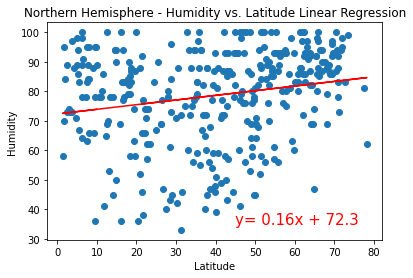

In [94]:
x = northern_hemisphere['Lat']
y = northern_hemisphere['Humidity']

plt.xlabel('Latitude')
plt.ylabel('Humidity')
title = ('Northern Hemisphere - Humidity vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (45, 35))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22686


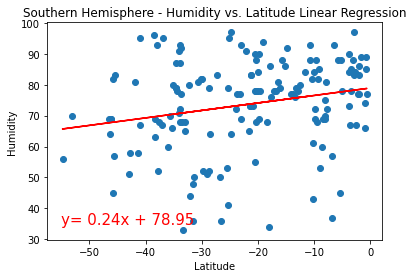

This set of matplotlib scatter plots are analyzing the humidity on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. Humidity showed a slight positive to no correlation along increasing latitudes in both hemispheres, although most of the cities had a humidity level greater than 70 across the dataset.


In [115]:
x = southern_hemisphere['Lat']
y = southern_hemisphere['Humidity']

plt.xlabel('Latitude')
plt.ylabel('Humidity')
title = ('Southern Hemisphere - Humidity vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (-55, 35))
print('This set of matplotlib scatter plots are analyzing the humidity on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. Humidity showed a slight positive to no correlation along increasing latitudes in both hemispheres, although most of the cities had a humidity level greater than 70 across the dataset.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26916


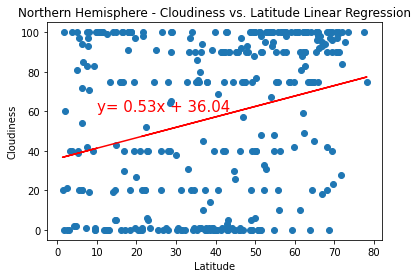

In [116]:
x = northern_hemisphere['Lat']
y = northern_hemisphere['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
title = ('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (10, 60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1269


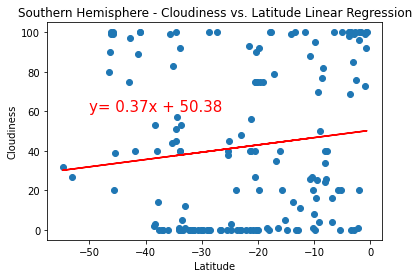

This set of matplotlib scatter plots are analyzing the cloudiness on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. Similar to humidity, cloudiness showed a slight positive to no correlation along increasing latitudes in both hemispheres.


In [117]:
x = southern_hemisphere['Lat']
y = southern_hemisphere['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
title = ('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (-50, 60))
print('This set of matplotlib scatter plots are analyzing the cloudiness on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. Similar to humidity, cloudiness showed a slight positive to no correlation along increasing latitudes in both hemispheres.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13689


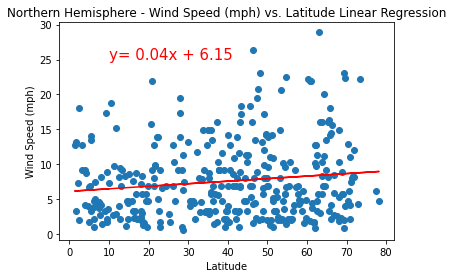

In [107]:
x = northern_hemisphere['Lat']
y = northern_hemisphere['Wind Speed']


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
title = ('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (10, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15525


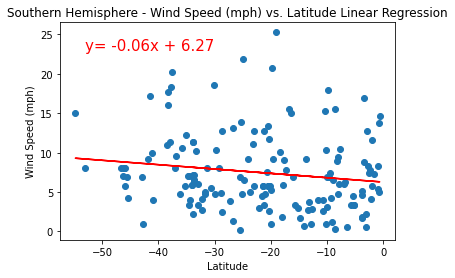

This set of matplotlib scatter plots are analyzing the wind speed on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. Wind speed showed a slight positive to no correlation in the direction of both poles. Most of the cities had a wind speed less than 5mph across the dataset.


In [118]:
x = southern_hemisphere['Lat']
y = southern_hemisphere['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
title = ('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression') 
plt.title(title)

lin_reg(x, y, (-53, 23))
print('This set of matplotlib scatter plots are analyzing the wind speed on 10/11/2020 relative to the latitudes of the cities within the northern hemisphere and the southern hemisphere. Wind speed showed a slight positive to no correlation in the direction of both poles. Most of the cities had a wind speed less than 5mph across the dataset.')